# ASSIGNMENT 2 : MDPs AND DYNAMIC PROGRAMMING

**Due date : 05/02/2018**

**By : Julien Roy and David Kanaa**


# SECTION 1 - Theory

## Bellman Optimality Equations

Using a contraction argument, show that there exists a solution to the Bellman optimality equations. That is : show that the Bellman optimality operator is a contraction mapping. (Doina covered the linear case in class ; here you need to go through the same steps but in the nonlinear case).

### <font color="grey">Solution</font>

The Bellman optmality operator can be defined as follows:
$$T^{*}\circ{V(s)} = \sup_{a \in \mathcal{A}} \left\{ r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)V(x) \right\}$$

Let $V$ and $U$ be two value functions over the state space $\mathcal{S}$. We have:
$$\forall s \space \in \space \mathcal{S}$$,
$$T^{*}\circ{V(s)} = \sup_{a \in \mathcal{A}} \left\{ r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)V(x) \right\} \space \mathrm{and}$$
$$T^{*}\circ{U(s)} = \sup_{a \in \mathcal{A}} \left\{ r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)U(x) \right\}$$

Thus, using <b>minkowski (triangle) inequality</b>, 
$${ T^{*}\circ{V(s)} - T^{*}\circ{U(s)} } = \sup_{a \in \mathcal{A}} \left\{ r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)V(x) \right\} - \sup_{a \in \mathcal{A}} \left\{ r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)U(x) \right\}$$
$$\leq \sup_{a \in \mathcal{A}} \left\{ \left(r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)U(x)\right) - \left(r(s, a) + \gamma \sum_{x \in \mathcal{S}} P(x | s, a)V(x) \right) \right\}$$
$$\leq \gamma \cdot \sup_{a \in \mathcal{A}} \left\{ \sum_{x \in \mathcal{S}} P(x | s, a) \left( U(x) - V(x)\right) \right\}$$
$$\leq \gamma \cdot \sup_{a \in \mathcal{A}} \left\{ \sum_{x \in \mathcal{S}} P(x | s, a)\right\} \sup_{x \in \mathcal{S}}\left\{ U(x) - V(x)\right\}$$

By definition of probabilities, $\sum_{x \in \mathcal{S}} P(x | s, a) \leq 1$, therefore,
$${ T^{*}\circ{V(s)} - T^{*}\circ{U(s)} } \leq \gamma \cdot \sup_{x \in \mathcal{S}}\left\{ U(x) - V(x)\right\}$$

Since this remains true $\forall s \in \mathcal{S}$, it is true especially for the suprenum:
$$\sup_{s \in \mathcal{S}} \left\{ T^{*}\circ{V(s)} - T^{*}\circ{U(s)} \right\} \leq \gamma \cdot \sup_{x \in \mathcal{S}}\left\{ U(x) - V(x)\right\}$$

As a result, the Bellman optimality operator $T^{*}$ is a contractive application over the space of state value functions $\mathbb{R}^{|\mathcal{S}|}$ for the infinite norm.
The <b>Banach fix point theorem (Picard theorem)</b> assures the existence and unicity of a solution that is the fixed point of the contraction.

## Policy Iteration 

Show that the values of two successive policies generated by policy iteration are nondecreasing. Assume a finite MDP and conclude (explain why) that policy iteration must terminate under a finite number of steps. Finally, show that upon termination, policy iteration must have found an optimal policy (ie. one which satisfies the optimality equations).

### <font color="grey">Solution</font>

<b>Warning: Some equations may not render (properly or at all) on GitHub, please download the notebook !!!</b>

Because of the greedification during the policy improvement, 

$${\pi_{k+1}} = \arg\max_{a \in \mathcal{A}} q_{\pi_{k}}(s, a)$$

and,

$$v_{\pi_{k}}(s) \leq q_{\pi_{k}}\left(s, \pi_{k+1}(s)\right) = \mathbb{E}\left[ R_{t+1} + \gamma v_{\pi_{k}}(S_{t+1}) \space \, \middle| \, \space S_{t}=s, A_{t}=\pi_{k+1}(s) \right] = \mathbb{E}_{\pi_{k+1}}\left[ R_{t+1} + \gamma v_{\pi_{k}}(S_{t+1}) \space \, \middle| \, \space S_{t}=s \right]$$

$$\leq \mathbb{E}_{\pi_{k+1}}\left[ R_{t+1} + \gamma q_{\pi_{k}}(S_{t+1}, \pi_{k+1}(S_{t+1}) \space \, \middle| \, \space S_{t}=s \right] = \mathbb{E}_{\pi_{k+1}}\left[ R_{t+1} + \gamma \mathbb{E}_{\pi_{k+1}}\left[ R_{t+2} + \gamma v_{\pi_{k}}(S_{t+2})\right] \space \, \middle| \, \space S_{t}=s \right] = \mathbb{E}_{\pi_{k+1}}\left[ R_{t+1} + \gamma  R_{t+2} + \gamma^{2} v_{\pi_{k}}(S_{t+2}) \space \, \middle| \, \space S_{t}=s \right]$$

$$...$$
$$\leq \mathbb{E}_{\pi_{k+1}}\left[ \left( \sum_{k=0}^{n} \gamma^{k}  R_{t+1+k} \right) + \gamma^{n+1} v_{\pi_{k}}(S_{t+n+1}) \space \, \middle| \, \space S_{t}=s \right]$$

$$...$$
$$\leq \mathbb{E}_{\pi_{k+1}}\left[ \sum_{k=0}^{\infty} \gamma^{k}  R_{t+1+k} \space \, \middle| \, \space S_{t}=s \right] = v_{\pi_{k+1}}(s)$$

Thus $v_{\pi_{k}}(s) \leq v_{\pi_{k+1}}(s)$, the values of the two successive policies are non decreasing.

Assuming that we have a finite MDP, there is a finite number of states and actions, thus a finite number of policies to visit during the policy improvement (greedification). If $m = |\mathcal{S}|\times|\mathcal{A}|$ is the number of state-action pairs, the maximum number of such policies is $2^{m}$.
Therefore the process of policy iteration must terminate under a finite number of steps. If $q$ is that number, we'll have $v_{\pi_{q}} = v_{\pi_{q+1}}$ upon termination. Which means that during the last policy improvement $T^{*}V_{\pi_{q}} = V_{\pi_{q+1}} = V_{\pi_{q}}$, where $T^{*}$ is the Bellman optimality operator. Therefore $V_{\pi_{q}}$ is the fixed point of the Bellman optimality operator, and $\pi_{q}$ the optimal policy.

# SECTION 2 - PROGRAMMING (track #1)

In [59]:
import numpy as np
import time
import copy
import operator
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

Given a MDP for which we have a complete model of the environment, maybe the most naive way of solving the prediction problem (computing a precise estimate of the value function given a policy) and the control problem (finding the optimal policy) is to use algorithms of Dynamic Programming (DP). This family of algorithms is of great interest in Reinforcement Learning because their theoretical properties a better known than other competing methods. They are not very flexible and have quite demanding restrictions (like having a complete model of the environment and an environment with a reasonably small number of states). However, in those setups, they allow to find exact solutions and their convergence garantees can be verified.

The two most known algorithms of DP are Policy Iteration and Value Iteration. 

In **Policy Iteration**, the procedure works in two step, we first operates many sweeps over all the states of the environment and update our value estimate of each state by using the Bellman equation for $v_{\pi}$ as an update rule, with respect to our current policy. When our value function estimate converges, the second step simply consists in updating our policy for being greedy with respect to our value function estimate. This 2 step process (policy evaluation and policy improvement) is repeated for as many iterations as necessary until the pollicy becomes stable (stops changing).

In **Value Iteration**, the two steps are, in a way, fused into one. The value function

Finally, a whole spectrum of intermediate algorithms can be refered to as **Modified Policy Iteration**. The simple example of modified policy iteration we explore in this assignment is to execute the first step of policy iteration (policy evaluation) for a fixed number of sweeps k, before jumping to the second step (policy improvement). This allows for a compromise between pure Policy Iteration and Value Iteration.

# 2-states MDP

Here we implement the three algorithms and test them on the very simple 2-states environment shown in the image below. This experiment is a sort of sanity test in which we primarily aim to validate that those 3 algorithms can find the optimal policy. We run these experiments with a fixed discount factor $\gamma$.

* $P(s_0 | s_0, a_0) = 0.5,  r = 5$
* $P(s_1 | s_0, a_0) = 0.5,  r = 5$
* $P(s_0 | s_0, a_1) = 0$
* $P(s_1 | s_0, a_1) = 1,  r = 10$
* $P(s_1 | s_0, a_2) = 0$
* $P(s_1 | s_1, a_2) = 1,  r = -1$


* $\gamma = 0.95$

![2-states world](2-states_world.png)

In [60]:
def create_2statesworld():

    P = np.zeros((2,2,3)) # P(s'|s,a) ... our model of the environment
    P[0,0,0] = 0.5
    P[1,0,0] = 0.5
    P[1,0,1] = 1.
    P[1,1,2] = 1.

    R = np.zeros((2,3))  # R(s,a) ... the reward funciton 
    R[0,0] = 5
    R[0,1] = 10
    R[1,2] = -1

    states = [0, 1]
    actions = [[0, 1], [2]]
    next_states = [0, 1]
    gamma = 0.95
    
    return P, R, states, actions, next_states, gamma

### Implementations

In [61]:
def policy_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma, epsilon=1e-4, modified=False):
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)  # V(s) ... our value function estimate for PI
    PI = copy.deepcopy(PI_init)  # PI(s) ... our greedy policy
    policy_stable = False
    all_k = []
    
    while not policy_stable:
        
        # 2. POLICY EVALUATION (iterates until V_k converges) 
        k = 0
        V_kplus1 = copy.deepcopy(V_k)
        delta = epsilon + 1
        while delta > epsilon and (k < 5 or not modified):

            delta = 0
            for s in states:
                v = 0
                for n in next_states:

                    # Bellman's update rule
                    a = int(PI[s])
                    v += P[n,s,a] * (R[s,a] + gamma * V_k[n])

                # Keeps biggest difference seen so far
                V_kplus1[s] = v
                delta = np.max([delta, np.abs(V_kplus1[s] - V_k[s])])

            # Updates our current estimate
            V_k = copy.deepcopy(V_kplus1)
            k += 1
        all_k.append(k)

        # 3. POLICY IMPROVEMENT (greedy action selection with respect to V_k)
        Q = {0: {0: 0,   # state0, action0
                 1: 0},  # state0, action1
             1: {2: 0}}  # state1, action2
        
        policy_stable = True
        old_PI = copy.deepcopy(PI)
        
        for s in states: 
            for a in actions[s]:
                for n in next_states:
                    
                    # Policy Improvement rule
                    Q[s][a] += P[n,s,a] * (R[s,a] + gamma * V_k[n])
                    
            PI[s] = max(Q[s].items(), key=operator.itemgetter(1))[0]
                    
            if old_PI[s] != PI[s]:
                policy_stable = False
    
    return V_k, all_k, PI 

In [62]:
def value_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma, epsilon=1e-4):
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)  # V(s) ... our value function estimate for PI
    PI = copy.deepcopy(PI_init)  # PI(s) ... our greedy policy
        
    # 2. POLICY EVALUATION (makes only 1 sweep before taking the max over the actions)
    k = 0
    V_kplus1 = copy.deepcopy(V_k)
    delta = epsilon + 1
    
    while delta > epsilon:

        delta = 0
        
        Q = {0: {0: 0,   # state0, action0
                 1: 0},  # state0, action1
             1: {2: 0}}  # state1, action2
        for s in states:
            v = 0
            for a in actions[s]:
                for n in next_states:
                
                    # Bellman's optimality update rule
                    Q[s][a] += P[n,s,a] * (R[s,a] + gamma * V_k[n])

            # This step replaces the poilicy improvement step (gets the maximal value)
            V_kplus1[s] = max(Q[s].items(), key=operator.itemgetter(1))[1]
            
            # Keeps biggest difference seen so far
            delta = np.max([delta, np.abs(V_kplus1[s] - V_k[s])])

        # Updates our current estimate
        V_k = copy.deepcopy(V_kplus1)
        k += 1
    
    # Updates the policy to be greedy with respect to the value function
    for s in states:
        PI[s] = max(Q[s].items(), key=operator.itemgetter(1))[0]
    
    return V_k, k, PI 

### Experiments

INITIALIZATION
Initial value function V is filled with zeros whereas initial policy is random among legal actions for each state

V =  [ 0.  0.]

PI =  [1 2]


RESULTS FOR POLICY ITERATION -------------
Policy found in 2 iterations, where each policy evaluation lasted for k = [181, 11]

V =  [ -8.57 -20.  ]

PI =  [0 2]


RESULTS FOR VALUE ITERATION -------------
Policy found in 181 iterations

V = 
 [ -8.57 -20.  ]

PI =  [0 2]


RESULTS FOR MODIFIED POLICY ITERATION -------------
Policy found in 2 iterations, where each policy evaluation lasted for k = [5, 5]

V =  [ 3.39 -8.03]

PI =  [0 2]


EFFECT OF GAMMA ON CONVERGENCE SPEED


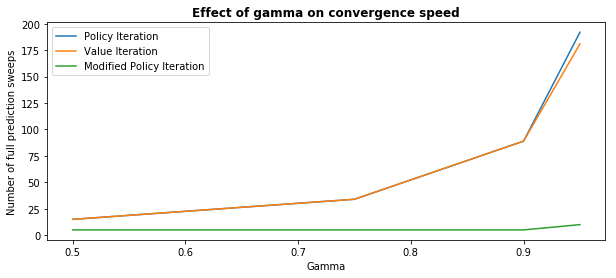

In [63]:
# Initializations
V_init = np.zeros((2,), dtype=np.float)                            # V(s) ... our value function estimate for PI
PI_init = np.array([np.random.uniform(0, 2), 2], dtype=np.int)     # PI(s) ... our greedy policy

# The 2-states world
P, R, states, actions, next_states, gamma = create_2statesworld()

print("INITIALIZATION")
print("Initial value function V is filled with zeros whereas initial policy is random among legal actions for each state")
print("\nV = ", np.round(V_init))
print("\nPI = ", PI_init)


PolIt_results = policy_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma)

print("\n\nRESULTS FOR POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(PolIt_results[1]), PolIt_results[1]))
print("\nV = ", np.round(PolIt_results[0], 2))
print("\nPI = ", PolIt_results[2])

ValIt_results = value_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma)

print("\n\nRESULTS FOR VALUE ITERATION -------------")
print("Policy found in {} iterations".format(ValIt_results[1]))
print("\nV = \n", np.round(ValIt_results[0], 2))
print("\nPI = ", ValIt_results[2])


M_PolIt_results = policy_iteration(V_init, PI_init, P, R, states, actions, next_states, gamma, modified=True)

print("\n\nRESULTS FOR MODIFIED POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(M_PolIt_results[1]), M_PolIt_results[1]))
print("\nV = ", np.round(M_PolIt_results[0], 2))
print("\nPI = ", M_PolIt_results[2])

print("\n\nEFFECT OF GAMMA ON CONVERGENCE SPEED")

logg = {"policy_iteration": [], "value_iteration": [], "M_policy_iteration": []}
# For different values of gamma
gammas = [0.50, 0.75, 0.90, 0.95]
for g in gammas:
    
    # Run Policy Iteration
    _, PolIt_k, _ = policy_iteration(V_init, PI_init, P, R, states, actions, next_states, g)
    logg['policy_iteration'].append(sum(PolIt_k))
    
    # Run Value Iteration
    _, ValIt_k, _ = value_iteration(V_init, PI_init, P, R, states, actions, next_states, g)
    logg['value_iteration'].append(ValIt_k)
    
    # Run Modified Policy Iteration
    _, M_PolIt_k, _ = policy_iteration(V_init, PI_init, P, R, states, actions, next_states, g, modified=True)
    logg['M_policy_iteration'].append(sum(M_PolIt_k))
    
plt.figure(figsize=(10,4))
plt.plot(gammas, logg['policy_iteration'], label="Policy Iteration")
plt.plot(gammas, logg['value_iteration'], label="Value Iteration")
plt.plot(gammas, logg['M_policy_iteration'], label="Modified Policy Iteration")
plt.title('Effect of gamma on convergence speed', fontweight='bold')
plt.xlabel('Gamma')
plt.ylabel('Number of full prediction sweeps')
plt.legend(loc='best')
plt.show()

### Discussion

In this setup, although all the algorithms converge to the optimal policy, Modified Policy Iteration performs many fewer sweeps to find the optimal policy than the classic Policy and Value Iteration algorithms. We also look at the effect of the discount factor gamma on the number of necessary sweeps to and see that it has a great impact on Policy Iteration and Value Iteration for this setup, but does not greatly affect Modified Policy Iteration.

# Gridworld MDP

Now that we have a proof of concept of those algorithms, we can try them on slghtly more appealing problems like a classic GridWorld MDP in which an agent tries to find the policy that will guide it to the closest terminal state from ay point in a two dimensional grid. To implement the environment, we start from some code used in Sutton and Barto's textbook (available [here](http://incompleteideas.net/book/the-book-2nd.html)) and modify it a little bit to allow user defined terminal states.

(Image taken from Sutton's slides on DP)
![grid world](gridworld.PNG)

In [64]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

def create_gridworld(world_size, terminal_states):
    """
    world_size: height and width of the squared-shape gridworld
    return
        actions: list of str, possible actions
        states: list of coordinate tuples representing all non-terminal states
        nextState: list of list of dict, index 3 times to return the next state coordinate tuple
    """

    # left, up, right, down
    actions = ['L', 'U', 'R', 'D']

    # Next
    nextState = []
    for i in range(0, world_size):
        nextState.append([])
        for j in range(0, world_size):
            # Creates a dictionnary that
            next = dict()
            if i == 0:
                next['U'] = (i, j)
            else:
                next['U'] = (i - 1, j)

            if i == world_size - 1:
                next['D'] = (i, j)
            else:
                next['D'] = (i + 1, j)

            if j == 0:
                next['L'] = (i, j)
            else:
                next['L'] = (i, j - 1)

            if j == world_size - 1:
                next['R'] = (i, j)
            else:
                next['R'] = (i, j + 1)

            nextState[i].append(next)
            
    states = []
    for i in range(0, world_size):
        for j in range(0, world_size):
            if (i,j) in terminal_states:
                continue
            else:
                states.append((i, j))
                
    return actions, states, nextState

### Implementations

In [65]:
def policy_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon=1e-4, modified=False):

    # The reward is always -1
    R = -1
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)
    PI = copy.deepcopy(PI_init)
    policy_stable = False
    all_k = []
    idx_to_a = {0:'L', 1:'U', 2:'R', 3:'D'}

    while not policy_stable:
        
        # 2. POLICY EVALUATION (iterates until V_k converges)
        k = 0
        V_kplus1 = copy.deepcopy(V_k)
        delta = epsilon + 1
        
        while delta > epsilon and (k < 5 or not modified):

            delta = 0
            for i, j in states:
                
                # Here the next state is fully defined by the policy (there is no uncertainty on the transition)
                a = idx_to_a[PI[i,j]]
                newPosition = nextState[i][j][a]
                P = 1.

                # Bellman's update rule
                V_kplus1[i, j] = P * (R + gamma * V_k[newPosition[0], newPosition[1]])

                # Keeps biggest difference seen so far
                delta = np.max([delta, np.abs(V_kplus1[i,j] - V_k[i,j])])

            # Updates our current estimate
            V_k = copy.deepcopy(V_kplus1)
            k += 1
        all_k.append(k)

        # 3. POLICY IMPROVEMENT (greedy action selection with respect to V_k)
        Q = np.zeros((world_size, world_size, 4), dtype=np.float)
        
        policy_stable = True
        old_PI = copy.deepcopy(PI)
        
        for i, j in states:
            for a_idx in range(4): # actions
                    
                # Again the next state is fully defined by the chosen action (there is no uncertainty on the transition)
                a = idx_to_a[a_idx]
                newPosition = nextState[i][j][a]
                P = 1.

                # Policy Improvement rule
                Q[i,j,a_idx] = P * (R + gamma * V_k[newPosition[0], newPosition[1]])
                    
            PI[i,j] = np.argmax(Q[i,j,:])
                    
            if old_PI[i,j] != PI[i,j]:
                policy_stable = False
    
    return V_k, all_k, PI 

In [66]:
def value_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon=1e-4):

    # The reward is always -1
    R = -1
    
    #1. INITIALIZATION
    V_k = copy.deepcopy(V_init)
    PI = copy.deepcopy(PI_init)
    idx_to_a = {0:'L', 1:'U', 2:'R', 3:'D'}
        
    # 2. POLICY EVALUATION (makes only 1 sweep before taking the max over the actions)
    k = 0
    V_kplus1 = copy.deepcopy(V_k)
    delta = epsilon + 1
    Q = np.zeros((world_size, world_size, 4), dtype=np.float)
    while delta > epsilon:

        # Only one sweep of evaluation before taking the max
        delta = 0
        for i, j in states:
            # Now evaluates the value function for each state for every possible action (not just with respect to current policy)
            for a_idx in range(4): # actions

                # Again the next state is fully defined by the chosen action (there is no uncertainty on the transition)
                a = idx_to_a[a_idx]
                newPosition = nextState[i][j][a]
                P = 1.

                # Update rule
                Q[i,j,a_idx] = P * (R + gamma * V_k[newPosition[0], newPosition[1]])

            # This step replaces the poilicy improvement step
            V_kplus1[i,j] = np.max(Q[i,j,:])

            # Keeps biggest difference seen so far
            delta = np.max([delta, np.abs(V_kplus1[i,j] - V_k[i,j])])

        # Updates our current estimate
        V_k = copy.deepcopy(V_kplus1)
        k += 1
        
    # Updates the policy to be greedy with respect to the value function
    for i, j in states:
        PI[i,j] = np.argmax(Q[i,j,:])
    
    return V_k, k, PI 

In [67]:
def print_policy(policy, terminal_states):
    
    #idx_to_symbol = {0:'\u25C0', 1:'\u25BC', 2:'\u25B6', 3:'\u25BC'}
    idx_to_symbol = {0:'\u2190', 1:'\u2191', 2:'\u2192', 3:'\u2193'}
    
    border_str = "\u00B7 "
    for i in range(policy.shape[0]):
        border_str += "\u2015 "
    border_str += "\u00B7 "
    #print(border_str)
    
    for i in range(policy.shape[0]):
        
        string = ""
        #string = "| "
        for j in range(policy.shape[1]):
            
            if (i,j) in terminal_states:
                string += '\u25A0 '
            else:
                string += idx_to_symbol[policy[i, j]]+" "
        
        #string += "|"
        print(string)
    
    #print(border_str)
    
    return

### Experiments

INITIALIZATION
Initial value function V is filled with zeros whereas initial policy is random

V = 
 [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

PI = 
■ ← ↓ ← ← 
← → ↓ ↓ ↓ 
↑ → → ■ → 
→ ↑ ■ ↑ → 
← ↑ ↓ → ■ 


RESULTS FOR POLICY ITERATION -------------
Policy found in 3 iterations, where each policy evaluation lasted for k = [181, 4, 2]

V = 
 [[ 0. -1. -2. -2. -3.]
 [-1. -2. -2. -1. -2.]
 [-2. -2. -1.  0. -1.]
 [-2. -1.  0. -1. -1.]
 [-3. -2. -1. -1.  0.]]

PI = 
■ ← ← ↓ ← 
↑ ← → ↓ ← 
↑ → → ■ ← 
→ → ■ ← ↓ 
↑ ↑ ↑ → ■ 


RESULTS FOR VALUE ITERATION -------------
Policy found in 4 iterations

V = 
 [[ 0. -1. -2. -2. -3.]
 [-1. -2. -2. -1. -2.]
 [-2. -2. -1.  0. -1.]
 [-2. -1.  0. -1. -1.]
 [-3. -2. -1. -1.  0.]]

PI = 
■ ← ← ↓ ← 
↑ ← → ↓ ← 
↑ → → ■ ← 
→ → ■ ← ↓ 
↑ ↑ ↑ → ■ 


RESULTS FOR MODIFIED POLICY ITERATION -------------
Policy found in 3 iterations, where each policy evaluation lasted for k = [5, 4, 2]

V = 
 [[

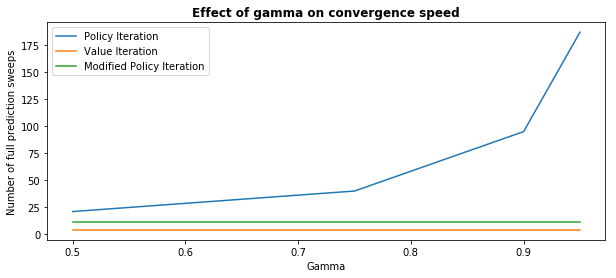

In [68]:
# Hyper-params
gamma = 0.95
epsilon = 1e-4

# The GRIDWORLD
world_size = 5
terminal_states = [(0,0), (world_size-1, world_size-1), (world_size-2, world_size-3), (2, world_size-int(world_size/2))]
actions, states, nextState = create_gridworld(world_size, terminal_states)

# Initializations
V_init = np.zeros((world_size, world_size), dtype=np.float)    # V(s) ... our value function estimate for PI
PI_init = np.random.randint(low=0, high=4, size=(world_size, world_size), dtype=np.int)     # PI(s) ... our greedy policy

print("INITIALIZATION")
print("Initial value function V is filled with zeros whereas initial policy is random")
print("\nV = \n", np.round(V_init))
print("\nPI = ")
print_policy(PI_init, terminal_states)

PolIt_results = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon)

print("\n\nRESULTS FOR POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(PolIt_results[1]), PolIt_results[1]))
print("\nV = \n", np.round(PolIt_results[0]))
print("\nPI = ")
print_policy(PolIt_results[2], terminal_states)

ValIt_results = value_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon)

print("\n\nRESULTS FOR VALUE ITERATION -------------")
print("Policy found in {} iterations".format(ValIt_results[1]))
print("\nV = \n", np.round(ValIt_results[0]))
print("\nPI = ")
print_policy(ValIt_results[2], terminal_states)

M_PolIt_results = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, gamma, epsilon, modified=True)

print("\n\nRESULTS FOR MODIFIED POLICY ITERATION -------------")
print("Policy found in {} iterations, where each policy evaluation lasted for k = {}".format(len(M_PolIt_results[1]), M_PolIt_results[1]))
print("\nV = \n", np.round(M_PolIt_results[0]))
print("\nPI = ")
print_policy(M_PolIt_results[2], terminal_states)

print("\n\nEFFECT OF GAMMA ON CONVERGENCE SPEED")

logg = {"policy_iteration": [], "value_iteration": [], "M_policy_iteration": []}
# For different values of gamma
gammas = [0.50, 0.75, 0.90, 0.95]
for g in gammas:
    
    # Run Policy Iteration
    _, PolIt_k, _ = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, g, epsilon)
    logg['policy_iteration'].append(sum(PolIt_k))
    
    # Run Value Iteration
    _, ValIt_k, _ = value_iteration(V_init, PI_init, world_size, states, actions, nextState, g, epsilon)
    logg['value_iteration'].append(ValIt_k)
    
    # Run Modified Policy Iteration
    _, M_PolIt_k, _ = policy_iteration(V_init, PI_init, world_size, states, actions, nextState, g, epsilon, modified=True)
    logg['M_policy_iteration'].append(sum(M_PolIt_k))
    
plt.figure(figsize=(10,4))
plt.plot(gammas, logg['policy_iteration'], label="Policy Iteration")
plt.plot(gammas, logg['value_iteration'], label="Value Iteration")
plt.plot(gammas, logg['M_policy_iteration'], label="Modified Policy Iteration")
plt.title('Effect of gamma on convergence speed', fontweight='bold')
plt.xlabel('Gamma')
plt.ylabel('Number of full prediction sweeps')
plt.legend(loc='best')
plt.show()

### Discussion

In this new setup, the Modified Policy Iteration still converges a lot faster than regular Policy Iteration, but the fastest algorithm to converge is now Value Iteration. We also note that the convergence speed of Policy Iteration is again greatly influenced by the discount factor, and that a discount factor of $\gamma = 1$ can completely prevent it from converging. This is explained by the fact that eventhough this setup contains terminal states, termination is not guaranteed and therefore we are not in a pure episodic task (the agent could get stuck in a loop).

# Conclusion

By testing those three algorithms for different environment setups, and different values of discount factor, we confirmed some intuition that are underlined in Sutton and Bart's textbook. 

First we realize that **depending on the problem** (and on the discount factor), **a different number of policy evaluation sweeps may be optimal** before doing a policy improvement sweep. In the 2-states stochastic environment, Modified Policy Iteration with its fixed number of evaluation sweeps seemed to be favored, suggesting that spending some time to better evaluate the policy before changing it was profitable on the long run, whereas in the gridworld deterministic environment, it seemed that simply changing the policy as soon as possible allowed to rapidly get out of a bad policy and ending up at the optimal policy more quickly.

Second, we saw that **the discount factor can have a big influence on the convergence speed**, especially for Policy Iteration. Indeed, as Policy Iteration waits until its policy evaluation converge before changing the policy, it can get stuck in a policy lood due to random initialization, and relies on the discount factor for its value function to converge. Because Modified Policy Iteration doesn't wait until convergence of V before updating the policy, they don't suffer from that problem. Our version of Modified Policy Iteration therefore only focuses on finding the optimal policy, eventhough its estimate of the value function for that policy might be still far from the optimal value function. Finally, Value Iteration won't be influenced by the discount factor in an environment where it can put an end to the episode (like in the grodworld), but will be in a continuous environment like in the first 2-states problem (we can see that it requires 181 evaluation sweep to converge, just like the first pass of Policy Iteration). This is explained by the fact that eventhough it modifies more often its policy (like Modified Policy Iteration), it still has to wait until its value function estimate stabilizes.

Those intuitions can serve as heuristics to have an idea of what kind of algorithm would perform best for a given problem, but as there are a lot of ways one can make compromises between Policy and Value Iteration, from a practical point of view, it is still wiser to test different variations of Dynamic Programming algorithms to find which particular algorithm works best for a specific setup.